In [10]:
from boosted_lorenzetti.mlflow import load_mlflow_csv
from pathlib import Path
import seaborn as sns
import mplhep
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import pandas as pd
plt.style.use(mplhep.style.ATLAS)
mpl.rc('text', usetex = True)

import mlflow
tracking_uri = str(Path.home().absolute() / 'data' / 'lorenzetti' / 'mlruns')
tracking_uri = f'file://{tracking_uri}'
mlflow.set_tracking_uri(tracking_uri)

In [11]:
run_id = 'b0f2f67c10ca4f58af1666395fcfd05d'
client = mlflow.MlflowClient()
run = client.get_run(run_id)
run

<Run: data=<RunData: metrics={'epoch': 6.0,
 'exec_duration': 1362.9243631362915,
 'exec_end': 1754354306.147329,
 'exec_start': 1754352943.222966,
 'fit_duration': 1349.779394,
 'fit_end': 1754354294.485071,
 'fit_start': 1754352944.705677,
 'test_max_sp': 0.36566074009835253,
 'test_max_sp_acc': 0.5141549364676256,
 'test_max_sp_fpr': 0.0013769849326071798,
 'test_max_sp_threshold': 0.6020066738128662,
 'test_max_sp_tpr': 0.06348020297899594,
 'test_roc_auc': -0.5308249599990114,
 'train_acc_epoch': 0.5138890147209167,
 'train_acc_step': 0.46875,
 'train_loss_epoch': 0.6723400354385376,
 'train_loss_step': 0.6736574172973633,
 'train_max_sp': 0.36553575388321635,
 'train_max_sp_acc': 0.5140964150120705,
 'train_max_sp_epoch': 0.26469460129737854,
 'train_max_sp_fpr': 0.0014233226308298303,
 'train_max_sp_fpr_epoch': 7.390687096631154e-05,
 'train_max_sp_fpr_step': 0.0,
 'train_max_sp_step': 0.3527016043663025,
 'train_max_sp_threshold': 0.5986621975898743,
 'train_max_sp_tpr': 0.0634

In [12]:
run.data.metrics

{'train_loss_step': 0.6736574172973633,
 'train_max_sp_tpr_step': 0.0555555559694767,
 'test_max_sp_threshold': 0.6020066738128662,
 'exec_start': 1754352943.222966,
 'train_max_sp_fpr': 0.0014233226308298303,
 'test_roc_auc': -0.5308249599990114,
 'val_max_sp_tpr': 0.06375990808010101,
 'fit_end': 1754354294.485071,
 'train_max_sp_threshold': 0.5986621975898743,
 'exec_duration': 1362.9243631362915,
 'train_loss_epoch': 0.6723400354385376,
 'fit_duration': 1349.779394,
 'exec_end': 1754354306.147329,
 'train_max_sp_step': 0.3527016043663025,
 'train_roc_auc_epoch': 0.5308002233505249,
 'val_max_sp_fpr': 0.0011916321236640215,
 'test_max_sp_fpr': 0.0013769849326071798,
 'val_max_sp_thresh': 0.6023880839347839,
 'fit_start': 1754352944.705677,
 'val_max_sp_threshold': 0.6020066738128662,
 'train_max_sp_fpr_step': 0.0,
 'train_roc_auc': -0.5307698521249031,
 'test_max_sp': 0.36566074009835253,
 'val_max_sp_acc': 0.5143890247793258,
 'val_max_sp': 0.36615997552871704,
 'train_max_sp_epoch

In [17]:
metric_names = [
    'val_max_sp',
    'val_loss',
    'train_loss_epoch'
]
metrics_df = pd.DataFrame()
for name in metric_names:
    metric = client.get_metric_history(run_id, name)
    for i, m in enumerate(metric): 
        metrics_df.loc[i, name] = m.value
metrics_df

,val_max_sp,val_loss,train_loss_epoch
0,0.365997,0.676302,0.681416
1,0.365950,0.674437,0.675532
2,0.365974,0.673645,0.674128
3,0.366009,0.673014,0.673271
4,0.366078,0.672651,0.672802
5,0.366113,0.672533,0.672535
6,0.366160,0.672443,0.672340
7,0.366160,NaN,NaN


In [18]:
metrics_df = metrics_df.drop(7, axis=0)
metrics_df

,val_max_sp,val_loss,train_loss_epoch
0,0.365997,0.676302,0.681416
1,0.365950,0.674437,0.675532
2,0.365974,0.673645,0.674128
3,0.366009,0.673014,0.673271
4,0.366078,0.672651,0.672802
5,0.366113,0.672533,0.672535
6,0.366160,0.672443,0.672340


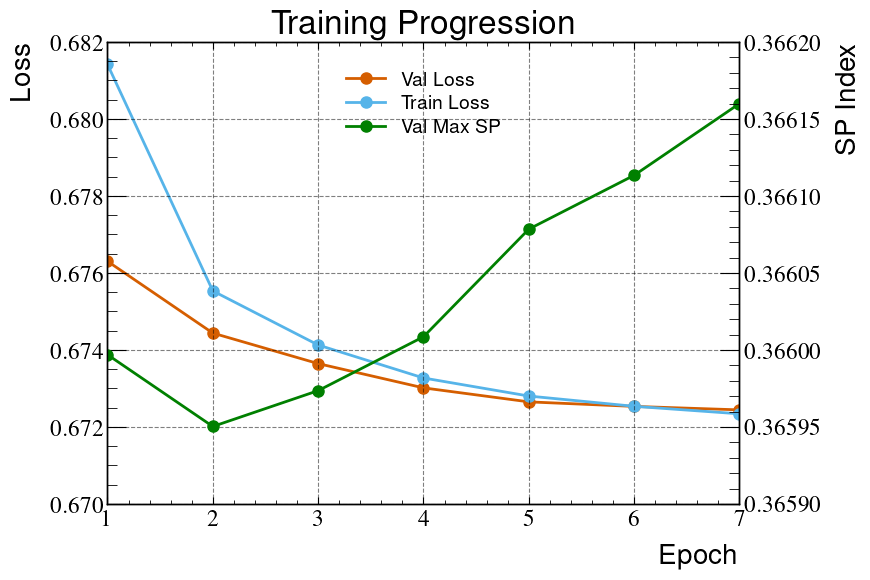

In [33]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=0.5, color='k')
epochs = np.arange(1, len(metrics_df)+1)
lines = ax.plot(epochs, metrics_df['val_loss'], label='Val Loss', marker='o')
lines +=ax.plot(epochs, metrics_df['train_loss_epoch'], label='Train Loss', marker='o')
ax.set(
    xlabel='Epoch',
    ylabel='Loss',
    title='Training Progression'
)
twinx = ax.twinx()
lines += twinx.plot(epochs, metrics_df['val_max_sp'], label='Val Max SP', marker='o', color='green')
twinx.set_ylabel('SP Index')
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')
twinx.ticklabel_format(axis='y', style='scientific')